In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Seeds dataset from UCI Machine Learning Repository

df = pd.read_csv("/Users/fahimeh/Projects/Data_science_prep/data/Seeds_dataset/Seed_Data.csv.xls")
df.columns = ['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry', 'groove', 'class']
df.head()

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [3]:
df['class'].value_counts()

class
0    70
1    70
2    70
Name: count, dtype: int64

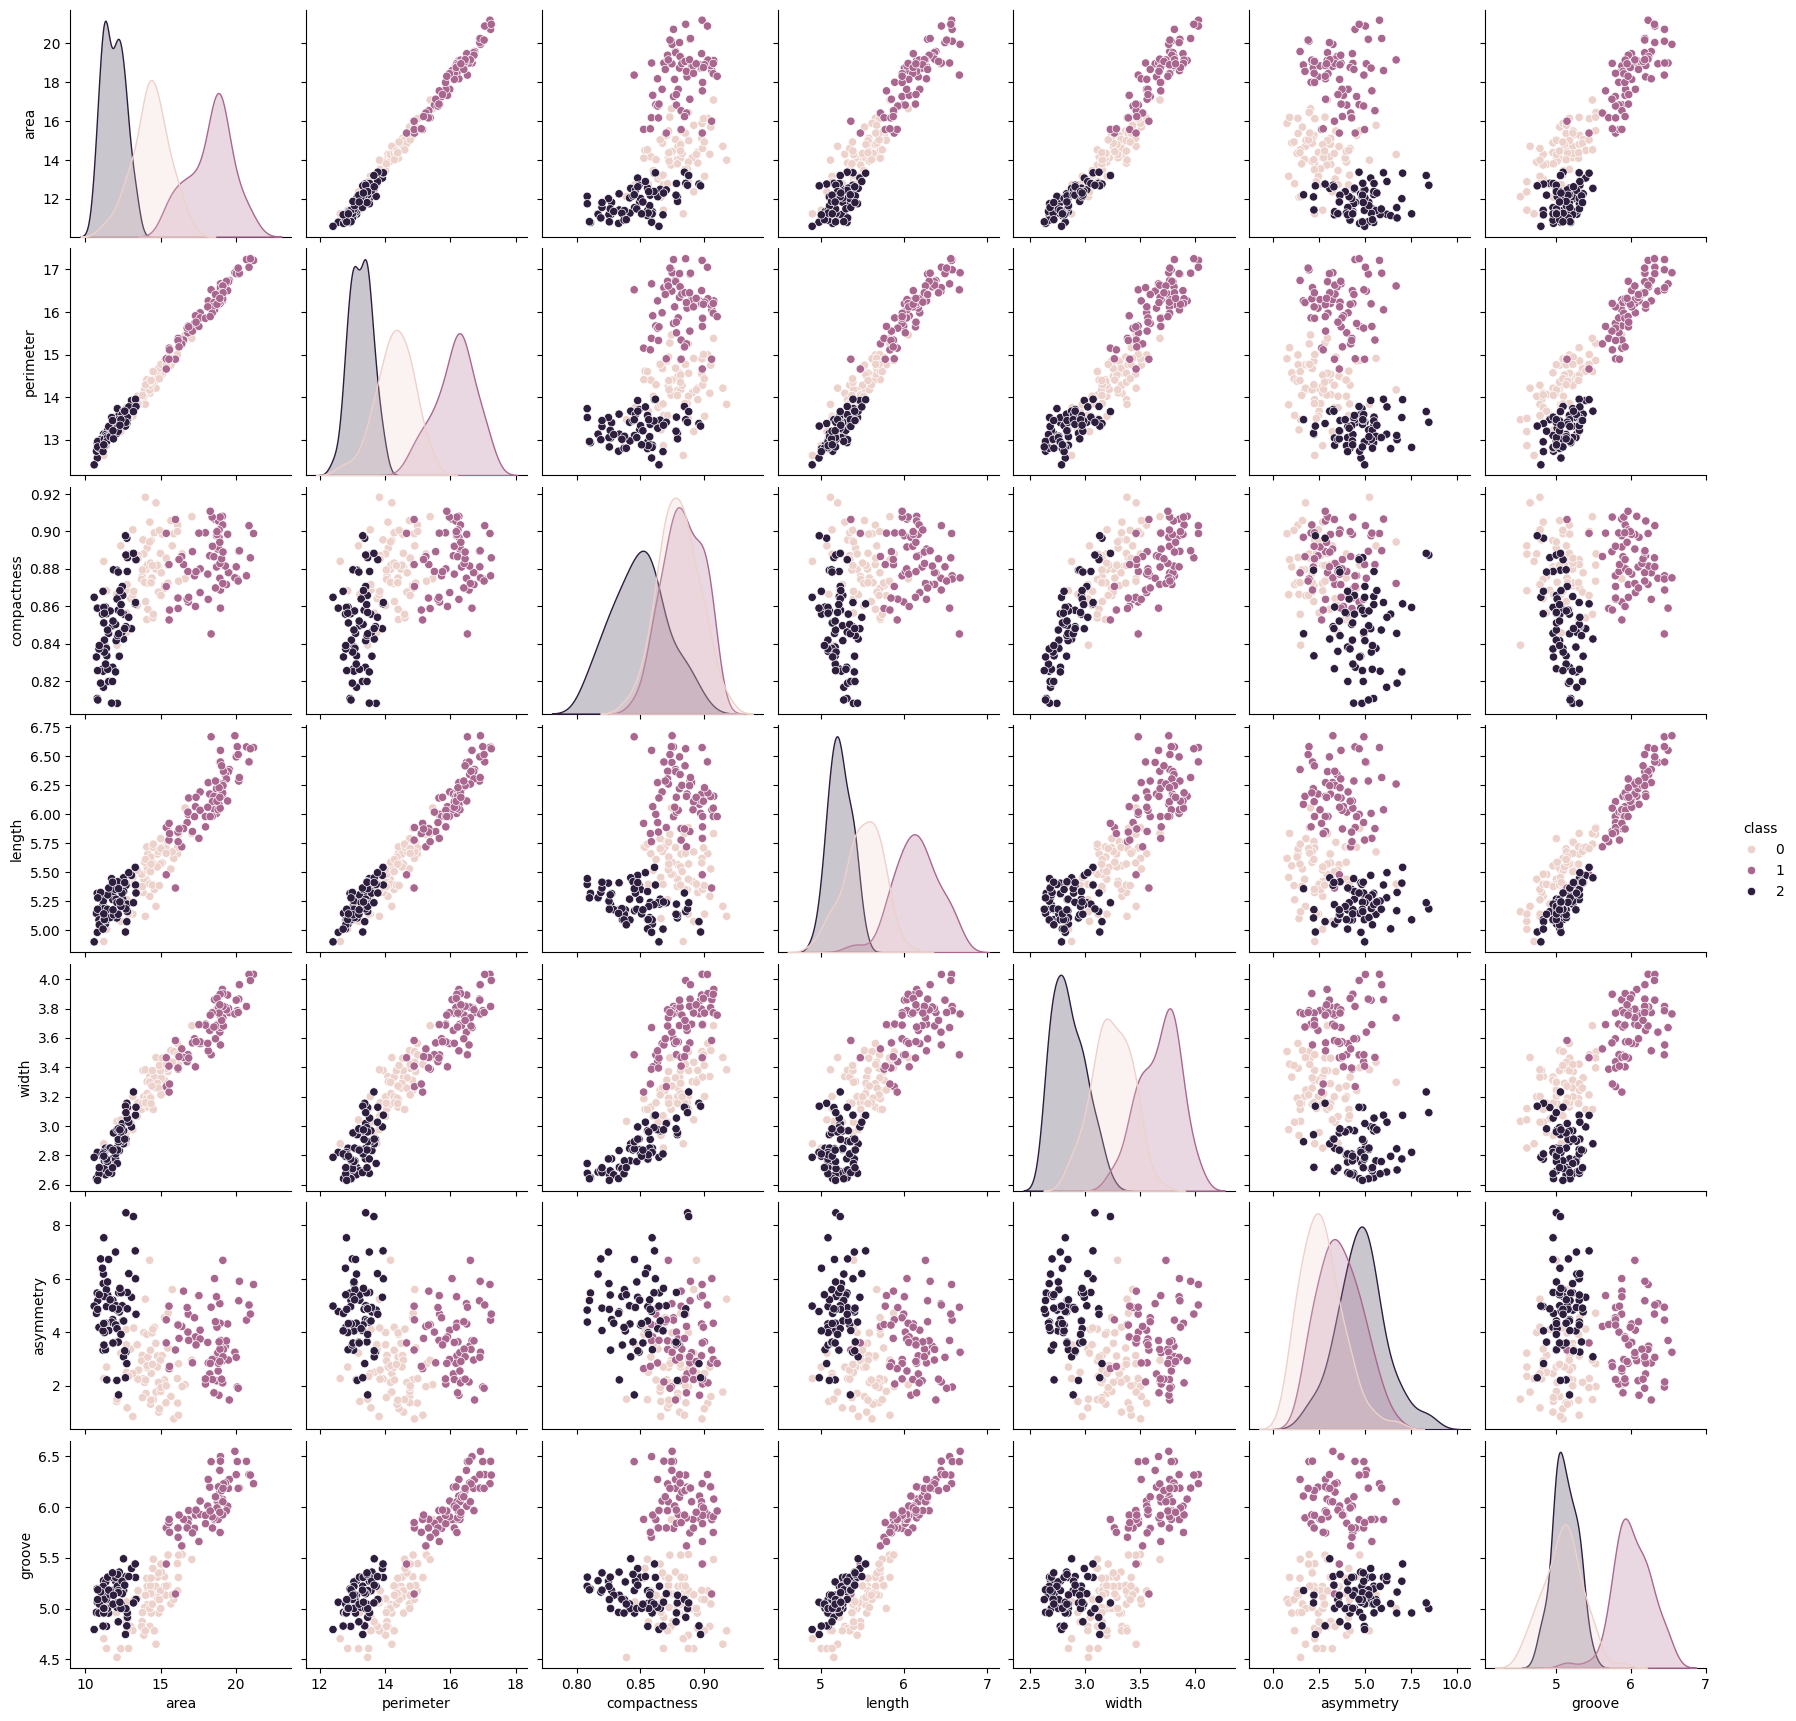

In [4]:
sns.pairplot(df, hue='class')
plt.show()

## Let's assume that we dont have the calss

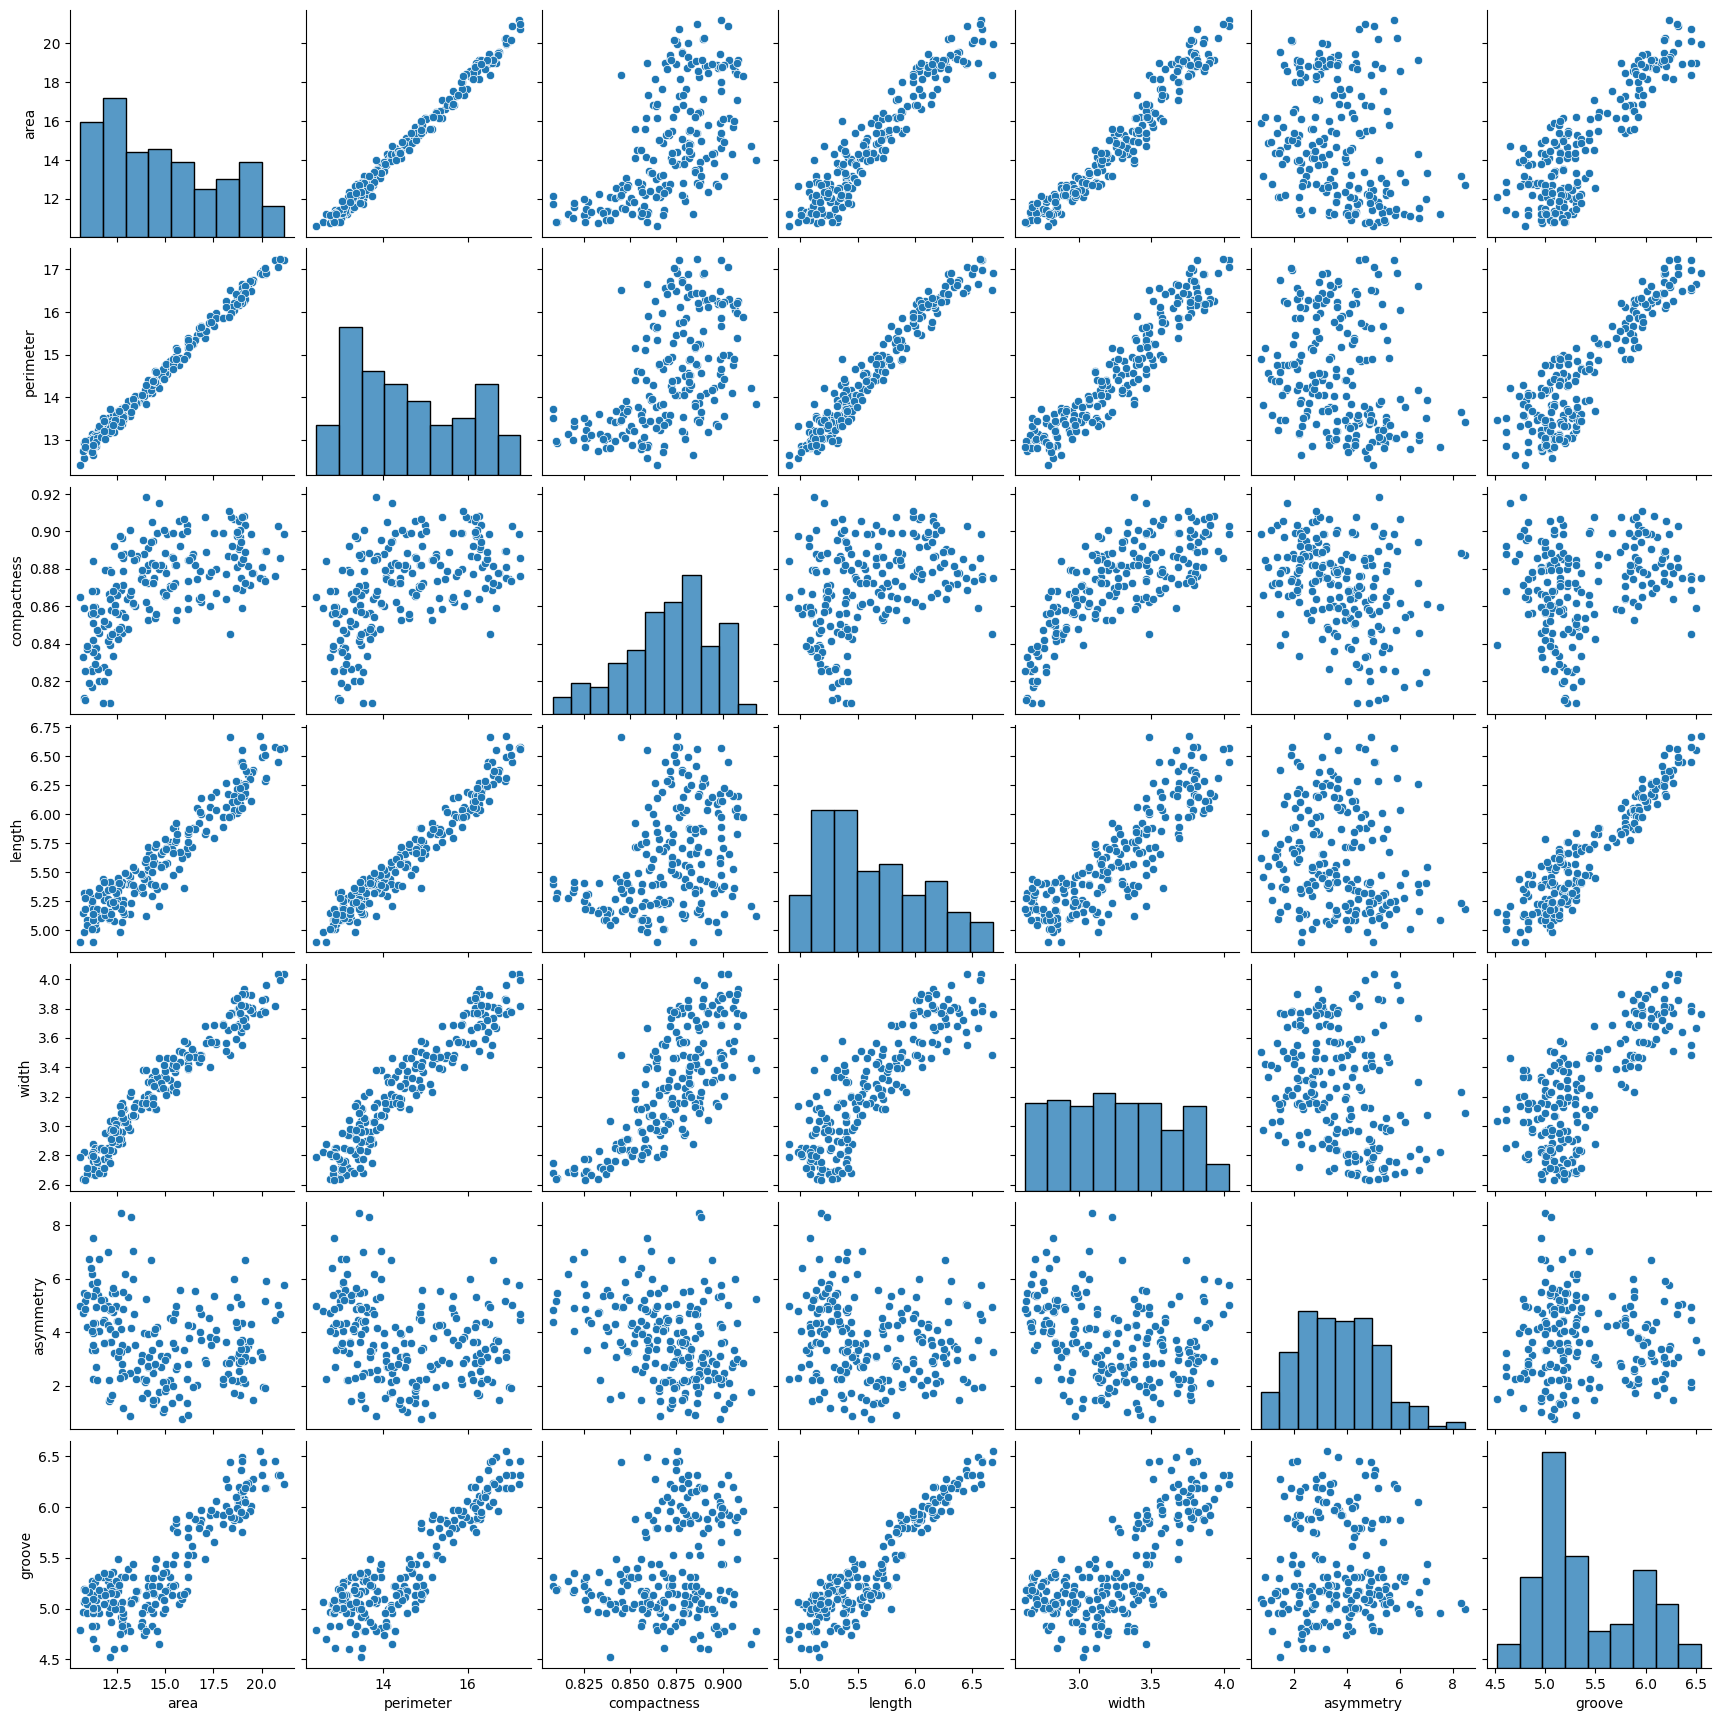

In [ ]:
sns.pairplot(df.drop('class', axis=1))
plt.show()

# Classification
Using previous learnings, we can use knn or naive bayes classification method in order to build a classifier for this data. like the following:

In [9]:
# split the data 
train, valid, test = np.split(df.sample(frac=1, random_state=42), [int(.6*len(df)), int(.8*len(df))])
print(len(train), len(valid), len(test))

126 42 42


In [10]:
def get_xy(dataframe, x_labels=None, y_label='class'):
    y = dataframe[y_label]
    if x_labels is None:
        x = dataframe.drop(columns=[y_label])
    else:
        x = dataframe.loc[:, x_labels]
    return x, y

In [11]:
X_train, y_train = get_xy(train, y_label='class')
X_valid, y_valid = get_xy(valid, y_label='class')
X_test, y_test = get_xy(test, y_label='class')

In [12]:
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_valid)
sklearn.metrics.accuracy_score(y_valid, y_pred)

0.8809523809523809

# Unsupervised learning
However, as you can see from the plot above, the classes are well separated using the features. So we can use unsupervised methods such as Kmean clustering or PCA to cluster the data.

## KMean clustering

In [21]:
X_train, y_train = get_xy(train, y_label='class', x_labels=['perimeter', 'asymmetry'])
X_valid, y_valid = get_xy(valid, y_label='class', x_labels=['perimeter', 'asymmetry'])
X_test, y_test = get_xy(test, y_label='class', x_labels=['perimeter', 'asymmetry'])

In [22]:
kmean = sklearn.cluster.KMeans(n_clusters=3, random_state=42)
kmean.fit(X_train)

y_pred = kmean.predict(X_valid)
print(sklearn.metrics.accuracy_score(y_valid, y_pred))  # not a good metric for clustering
print(sklearn.metrics.adjusted_rand_score(y_valid, y_pred))  # better metric for clustering    

0.023809523809523808
0.7184503757450117


In [23]:
kmean.cluster_centers_

array([[16.27027027,  3.36954054],
       [13.64425   ,  5.333175  ],
       [14.04061224,  2.5335551 ]])

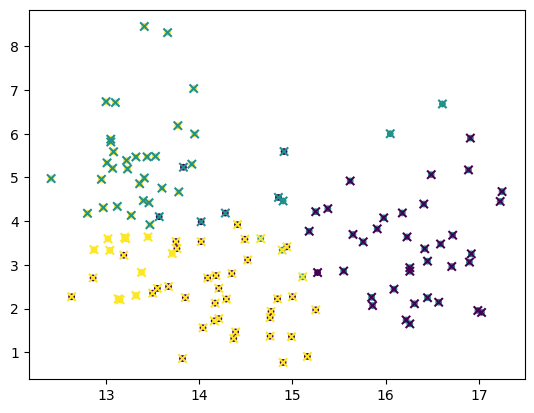

In [44]:
plt.scatter(X_train['perimeter'], X_train['asymmetry'], c=y_train, marker='o', s=15)
plt.scatter(X_train['perimeter'], X_train['asymmetry'], c=kmean.labels_, marker='x')

# PCA

In [48]:
X_train, y_train = get_xy(train, y_label='class')
X_valid, y_valid = get_xy(valid, y_label='class')
X_test, y_test = get_xy(test, y_label='class')

pca = sklearn.decomposition.PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

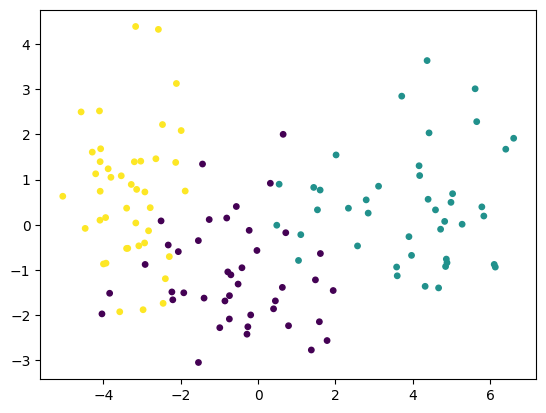

In [49]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, marker='o', s=15)